In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Hangfeldolgozás 2

A hangminták rögzítésére az `audacity` programot használhatjuk. A felvett hangminta fájlokat ne felejtse a jegyzőkönyvhöz csatolni.

Győződjön meg arról, hogy a külső hangkártya be van kapcsolva és a mikrofonokra fel van kapcsolva az úgy nevezett 48 _V_-os fantom táp. Az `audacity`-ben válassza ki a megfelelő bemeneti eszközt `AudioBox 1818 VSL: USB Audio (hw 1,0): Line: 0`. A hangkártya 96 kHz mintavételi rátát és 24 bit felbontást támogat. Igyekezzen ezt kihasználni.

## 1. feladat: A jel-zaj arány vizsgálata

A mérésben *etalon* hangforrást használunk. Ennek közelébe helyezze el a mikrofonokat, és állítsa be a hangszóró hangerejét, valamint a mikrofonok előerősítésének mértékét úgy, hogy a jelek ne legyenek túlvezérelve. Ebben segít az `audacity` felvételi monitora, ami az első két mikrofon jelét mutatja.

### 1. 1. A koordinátarendszer rögzítése - 2 pont

Helyezze el a mikrofonokat az asztalon a hangszórótól különböző távolságokra. Jelöljön ki egy arra alkalmas viszonyítási rendszert, és rögzítse hogy abban a mikrofonoknak mi a helye.

A választott koordinátarendszer leírása:
* Az origo helye: **asztal szélén, az asztal sarkától 91 cm-re**,
* Az $x$-tengely: **az asztal szélével párhuzamos**,
* Az $y$-tengely: **az asztal szélére merőleges**,
* A $z$-tengely: **az asztal síkjában 0**.
* A hangszóró helye: (0,30.5,0)

Mérési pontosság: 0.5 cm ; így a hiba +/- 0.25 cm

| Mikrofon száma | $x$ [_cm_] | $y$ [_cm_] | $z$ [_cm_] |
|----------------|------------|------------|------------|
| 1. |67 |45 | 0|
| 2. |25| 29.5|0|
| 3. | 19 | 8 | 0 |
| 4. |16  |55.5|0|
| 5. |61.5|7 | 0|
| 6. | 43.5|17.5|0|
| 7. | 92| 15| 0|

### 1. 2. Háttér felvétele - 5 pont

Vizsgáljuk meg, hogy a teremben milyen teljesítménye van az alapzajnak.

Rögzítsen alkalmasan hosszú jelalakot az összes mikrofont egyszerre felhasználva!

Az idősorok alapján határozza meg, az egyes csatornákat jellemző:
* amplitudóeloszlást, 
* az átlagos jelteljesítményt, és
* a teljesítményspektrumot!

Van-e eltérés az egyes csatornák között?

Az adatsort rövidebb szakaszokra bontva is határozza meg a várható jelteljesítményt, készítsen erről is ábrákat és elemezze!

Mit vár és mit tapasztal?

Megjegyzés:
* amplitudóeloszlás: hisztogram az amplitudókról
* átlagos teljesítmény: amplitudó abszolútérték négyzetének integrálja, leosztva az idővel
* teljesítményspektrum: amplitudó fourier trafója, majd abszolútérték négyzete

Van eltérés a csatornák között. Egy nem látható időeltolódás a mikrofonok távolságkülönbsége miatt, de itt a lényegesebb, ami jól látható, hogy az összetartozó amplitúdók nem azonos nagyságúak. Ezt két tényező okozza, az egyik, hogy a mikrofonok erősítése nem azonos, a másik, hogy nem biztos, hogy azonos szögből kapják a hangot, a mikrofonok pedig nem anizotrópok, "szemből" jobban veszik a hangot, mint oldalról vagy hátulról. Ezért készítettem egy felvételt, ahol a mikrofonokat egy pontba (egymásra és egy irányba nézve) helyeztem el és vettem fel velük hangot. E mérés alapján meghatározható az egyes mikrofonok súlyozása (relatív, a legnagyobb amplitudóhoz fogok viszonyítani).

In [2]:
from scipy.io import wavfile
hatter=[]
for i in range(1,8):
    fs, data = wavfile.read('hatter/Audio Track-{}.wav'.format(i))
    hatter.append([fs,data])

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
def multiabra(lista,title,xlabel,ylabel):
    f, axs = plt.subplots(len(lista)//2+len(lista)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    for i in range(len(lista)):
        matplotlib.tight_layout
        t=np.linspace(0,len(lista[i][1])/lista[i][0],len(lista[i][1]))
        axs[i].plot(t,lista[i][1],label="mért pontok",marker='.',markersize=1)
        axs[i].title.set_text('track {}'.format(i+1))
        axs[i].set_xlabel(xlabel,fontsize=18)
        axs[i].set_ylabel(ylabel,fontsize=18)
        #axs[i].legend()

In [4]:
def histabra(data,title):
    f, axs = plt.subplots(len(data)//2+len(data)%2,2,figsize=(18,15))
    f.subplots_adjust(hspace = 0.7, wspace=.2)
    f.suptitle(title,fontsize=24)
    axs = axs.ravel()
    eredmenyek=[]
    for i in range(len(data)):
        matplotlib.tight_layout
        x = data[i][1]
        num_bins = 100
        n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
        axs[i].hist(x, num_bins, facecolor='blue', alpha=0.5)
        axs[i].title.set_text('track {}'.format(i+1))
        axs[i].set_xlabel("A",fontsize=18)
        axs[i].set_ylabel("count",fontsize=18)
        #axs[i].legend()
        eredmenyek.append([n,bins,patches])
    return eredmenyek

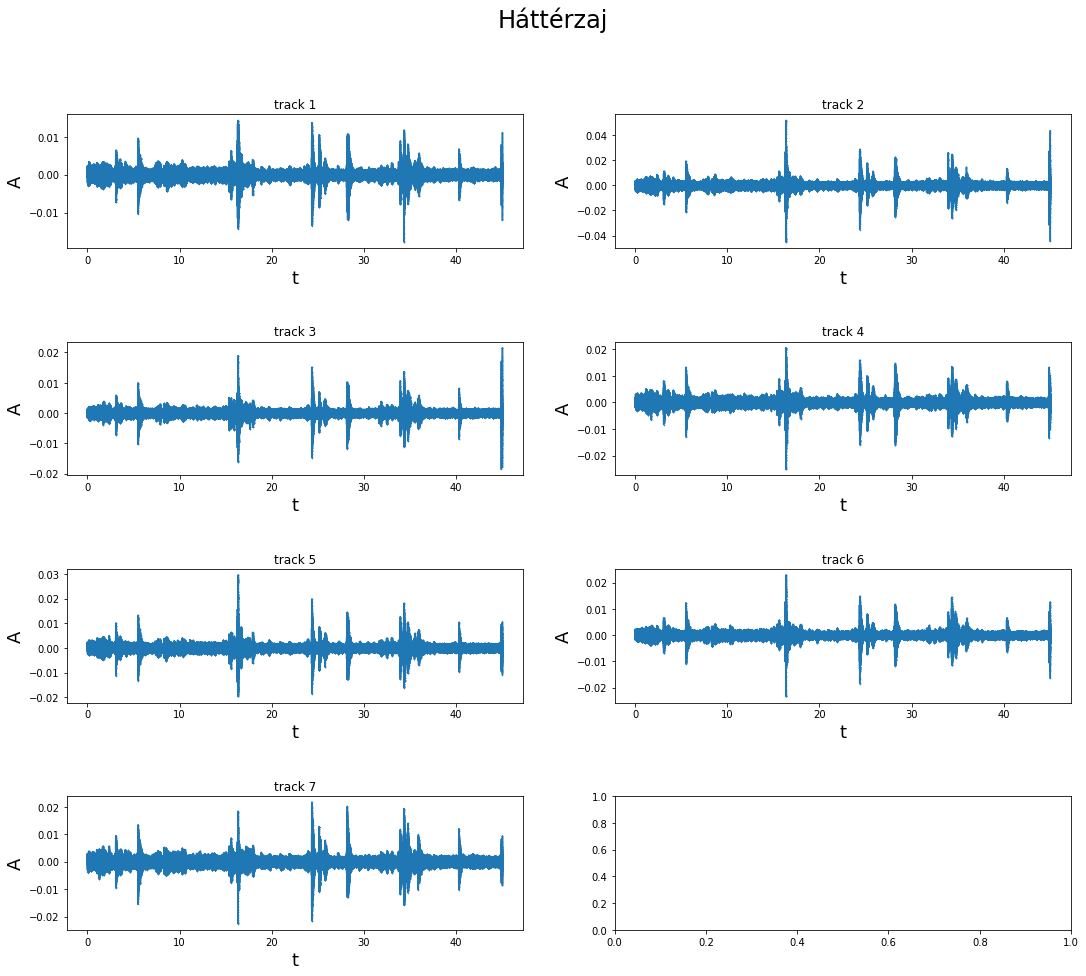

In [5]:
multiabra(hatter,"Háttérzaj",'t','A')

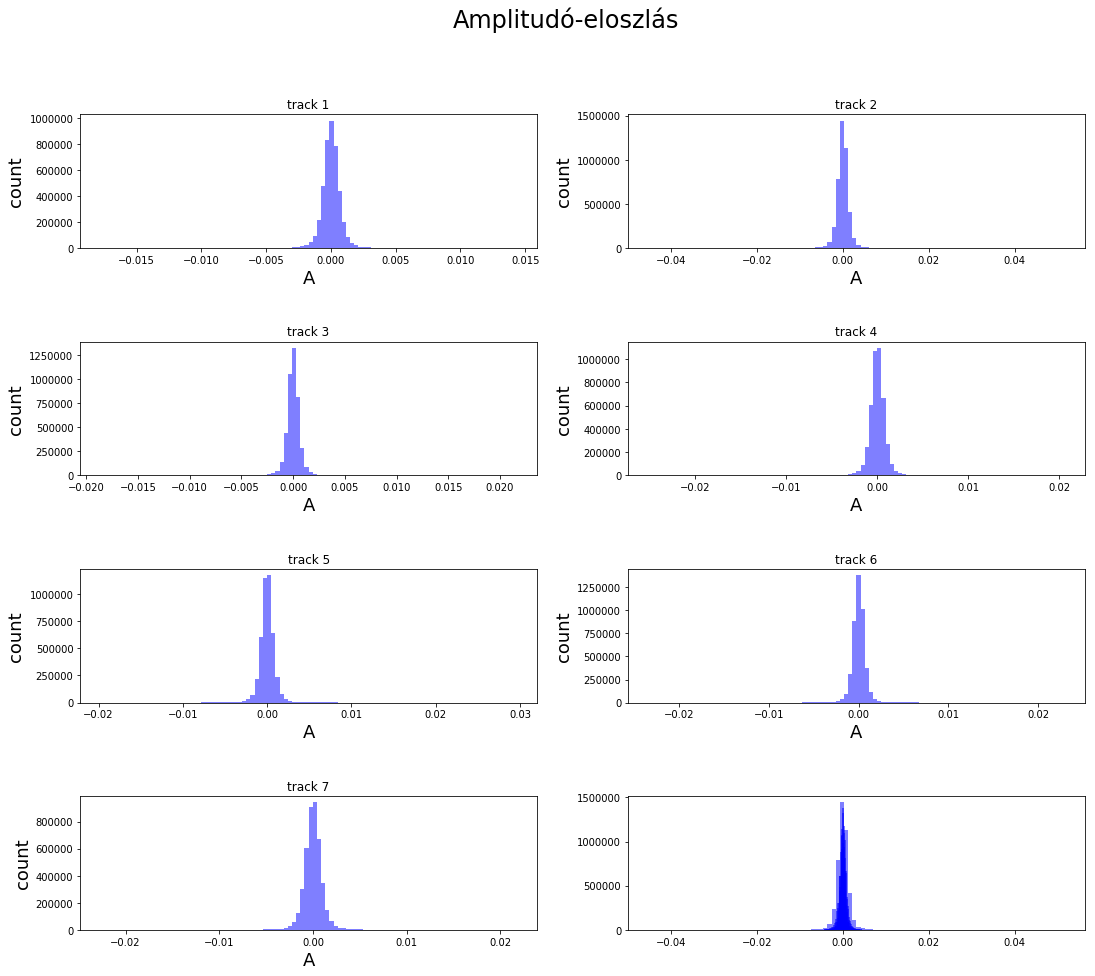

In [6]:
eredmenyek=histabra(hatter,"Amplitudó-eloszlás")

In [43]:
teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter]
t=[len(hatter[i][1])/hatter[i][0] for i in range(len(hatter))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))

Az 1. csatorna átlagos teljesítménye: 6.562119778310664e-07
Az 2. csatorna átlagos teljesítménye: 2.478470064436328e-06
Az 3. csatorna átlagos teljesítménye: 5.284336768101701e-07
Az 4. csatorna átlagos teljesítménye: 9.206639008076975e-07
Az 5. csatorna átlagos teljesítménye: 9.458692605858597e-07
Az 6. csatorna átlagos teljesítménye: 6.588383230521396e-07
Az 7. csatorna átlagos teljesítménye: 1.1699786452941794e-06


In [8]:
telspektrum=[[hatter[i][0],abs(np.fft.rfft(hatter[i][1]))**2] for i in range(len(hatter))]

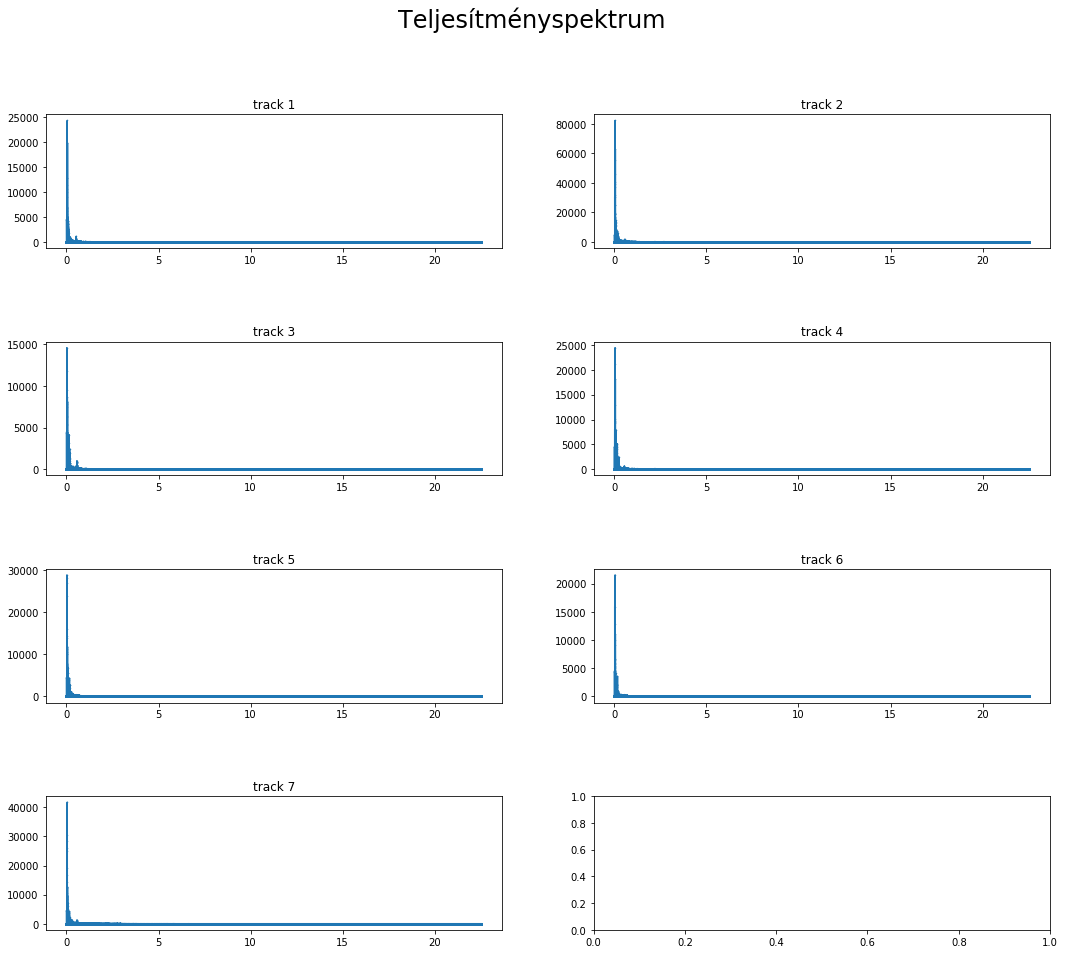

In [9]:
multiabra(telspektrum,"Teljesítményspektrum","","")

In [91]:
#a hatter listámban vannak a hangfile-jaim, azokat szeretném rövidebb szakaszokra bontani
def szetoszt(hatter,resz,sorszam,szeles=1): #lehet egy-egy pont kimarad (első vagy utolsó pontja az adott résznek)
    'sorszam 0-tól megy, rész: hány részre bontsa (a sorszám, hogy a felbontott részekből melyiket adja vissza). sorszam+szeles<rész'
    hosszok=[len(hatter[i][1]) for i in range(len(hatter))]
    lista_uj=[]
    for i in range(len(hatter)):
        adat=hatter[i][1][sorszam*(len(hatter[i][1])//resz):(sorszam+szeles)*(len(hatter[i][1])//resz)]
        lista_uj.append([hatter[i][0],adat])
    return lista_uj

In [92]:
hatter1=szetoszt(hatter,3,0)
hatter2=szetoszt(hatter,3,1)
hatter3=szetoszt(hatter,3,2)

In [45]:
teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter1]
t=[len(hatter1[i][1])/hatter1[i][0] for i in range(len(hatter1))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna első harmadának átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))

Az 1. csatorna első harmadának átlagos teljesítménye: 5.740132913658328e-07
Az 2. csatorna első harmadának átlagos teljesítménye: 2.0952658691861917e-06
Az 3. csatorna első harmadának átlagos teljesítménye: 4.2847669588363765e-07
Az 4. csatorna első harmadának átlagos teljesítménye: 8.079283390238778e-07
Az 5. csatorna első harmadának átlagos teljesítménye: 7.909127762978959e-07
Az 6. csatorna első harmadának átlagos teljesítménye: 5.55297092448054e-07
Az 7. csatorna első harmadának átlagos teljesítménye: 1.0544865680574132e-06


In [46]:
teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter2]
t=[len(hatter2[i][1])/hatter2[i][0] for i in range(len(hatter2))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna második harmadának átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))

Az 1. csatorna második harmadának átlagos teljesítménye: 9.15810536911362e-07
Az 2. csatorna második harmadának átlagos teljesítménye: 3.376787096456134e-06
Az 3. csatorna második harmadának átlagos teljesítménye: 6.854072923963418e-07
Az 4. csatorna második harmadának átlagos teljesítménye: 1.2692348798631525e-06
Az 5. csatorna második harmadának átlagos teljesítménye: 1.283791647710658e-06
Az 6. csatorna második harmadának átlagos teljesítménye: 9.074562032346571e-07
Az 7. csatorna második harmadának átlagos teljesítménye: 1.4177077134686285e-06


In [47]:
teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter3]
t=[len(hatter3[i][1])/hatter3[i][0] for i in range(len(hatter3))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna harmadik harmadának átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))

Az 1. csatorna harmadik harmadának átlagos teljesítménye: 4.788128335032133e-07
Az 2. csatorna harmadik harmadának átlagos teljesítménye: 1.963342020489777e-06
Az 3. csatorna harmadik harmadának átlagos teljesítménye: 4.7141674582167614e-07
Az 4. csatorna harmadik harmadának átlagos teljesítménye: 6.848303048832538e-07
Az 5. csatorna harmadik harmadának átlagos teljesítménye: 7.629042455390384e-07
Az 6. csatorna harmadik harmadának átlagos teljesítménye: 5.137621027443628e-07
Az 7. csatorna harmadik harmadának átlagos teljesítménye: 1.0377389183332073e-06


A felosztásnál kicsit eltérő eredményeket kaptam, ezt a teremben folytatott beszélgetés és zörgés változása okozta, amiket hallgatótársaim generáltak. Még hangsúlyosabb eltérést kapunk, ha kisebb időszakaszokat vizsgálunk: 

Az 1. csatorna 24/32 részének átlagos teljesítménye: 2.2362782117268897e-06
Az 2. csatorna 24/32 részének átlagos teljesítménye: 9.455218674500726e-06
Az 3. csatorna 24/32 részének átlagos teljesítménye: 2.3303939443223877e-06
Az 4. csatorna 24/32 részének átlagos teljesítménye: 3.122582567473809e-06
Az 5. csatorna 24/32 részének átlagos teljesítménye: 3.965142074953217e-06
Az 6. csatorna 24/32 részének átlagos teljesítménye: 2.5167784679410207e-06
Az 7. csatorna 24/32 részének átlagos teljesítménye: 5.21437383944177e-06


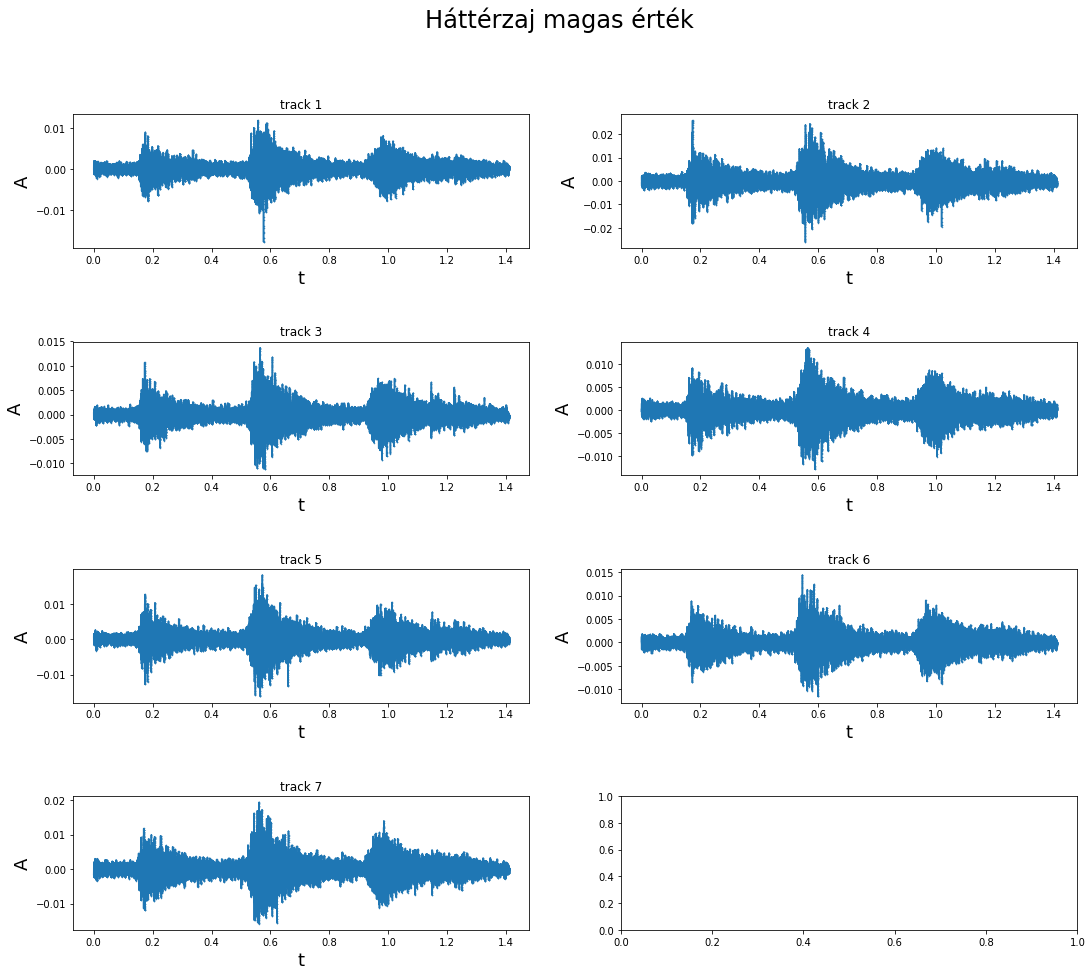

In [70]:
hatter24_32=szetoszt(hatter,32,24)

teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter24_32]
t=[len(hatter24_32[i][1])/hatter24_32[i][0] for i in range(len(hatter24_32))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna 24/32 részének átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))

multiabra(hatter24_32,"Háttérzaj magas érték",'t','A')

Az 1. csatorna 23/32 részének átlagos teljesítménye: 2.565559750899557e-07
Az 2. csatorna 23/32 részének átlagos teljesítménye: 9.847500380197356e-07
Az 3. csatorna 23/32 részének átlagos teljesítménye: 2.487945267746292e-07
Az 4. csatorna 23/32 részének átlagos teljesítménye: 3.6805496373659194e-07
Az 5. csatorna 23/32 részének átlagos teljesítménye: 4.01185426519982e-07
Az 6. csatorna 23/32 részének átlagos teljesítménye: 2.750139099781331e-07
Az 7. csatorna 23/32 részének átlagos teljesítménye: 5.940198794646512e-07


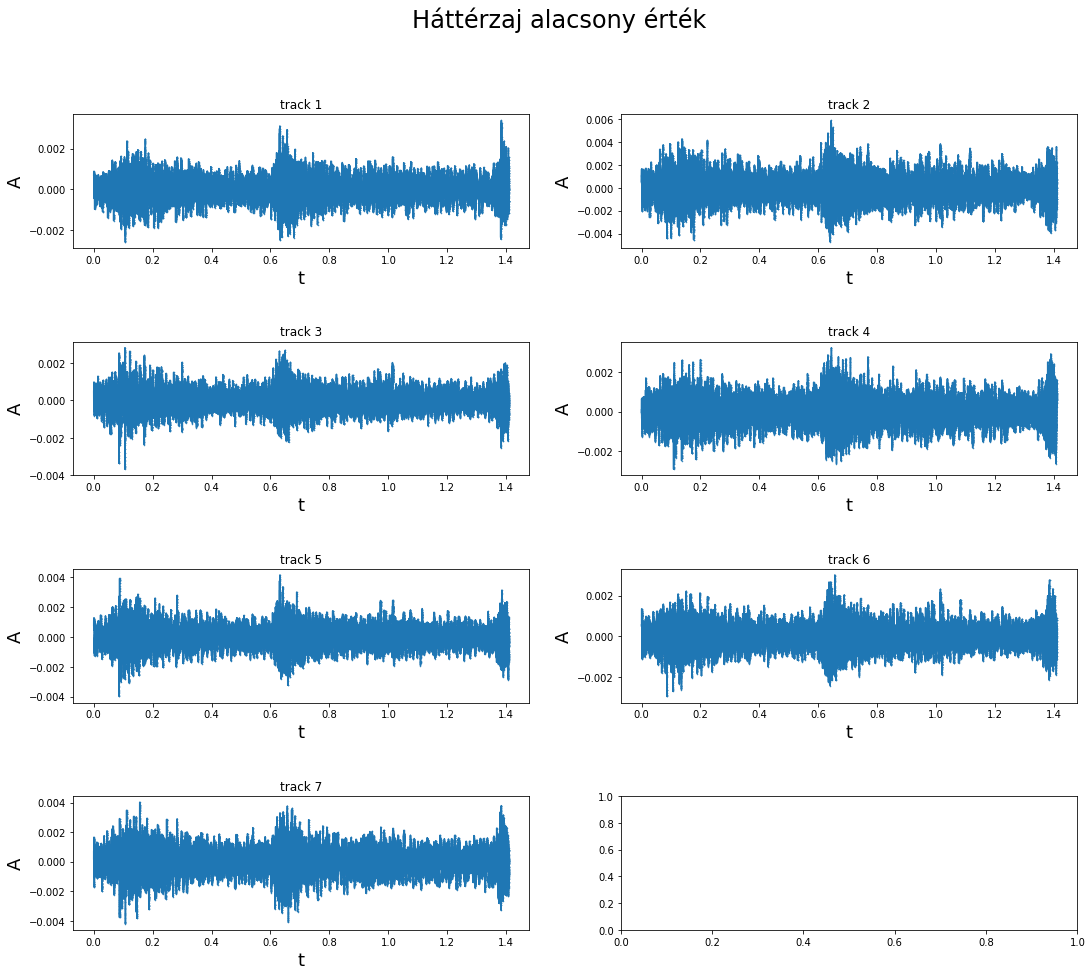

In [71]:
hatter23_32=szetoszt(hatter,32,23)

teljesitmenyek=[sum((1/i[0])*i[1]**2) for i in hatter23_32]
t=[len(hatter23_32[i][1])/hatter23_32[i][0] for i in range(len(hatter23_32))]
for i in range(len(teljesitmenyek)):
    j=i+1
    print("Az {}. csatorna 23/32 részének átlagos teljesítménye: {}".format(j,teljesitmenyek[i]/t[i]))
    
multiabra(hatter23_32,"Háttérzaj alacsony érték",'t','A')

### 1. 3. Kopogtató jele - 5 pont

Rögzítse a korábban beállított etalon hangforrás jelét.

A rögzített mintákban keresse meg a kopogtató jelét és számolja ki a koppanásokhoz tartozó jel teljesítményét!

Készítse el a teljesítményspektrumot és vesse egybe a háttérrel.

Térjen ki a következő kérdések megválaszolására:
* Mennyire ingadozik egy-egy csatornán belül a koppanáshoz tartozó jelteljesítmény érték?
* Milyen jel-zaj viszonyt tud becsülni az egyes csatornákra?
* Vizsgálja meg a jel/zaj viszony távolság függését!

In [73]:
kopogas=[]
for i in range(1,8):
    fs, data = wavfile.read('kopogas/Audio Track-{}.wav'.format(i))
    kopogas.append([fs,data])

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [109]:
kopogasc=szetoszt(kopogas,100,42,33)

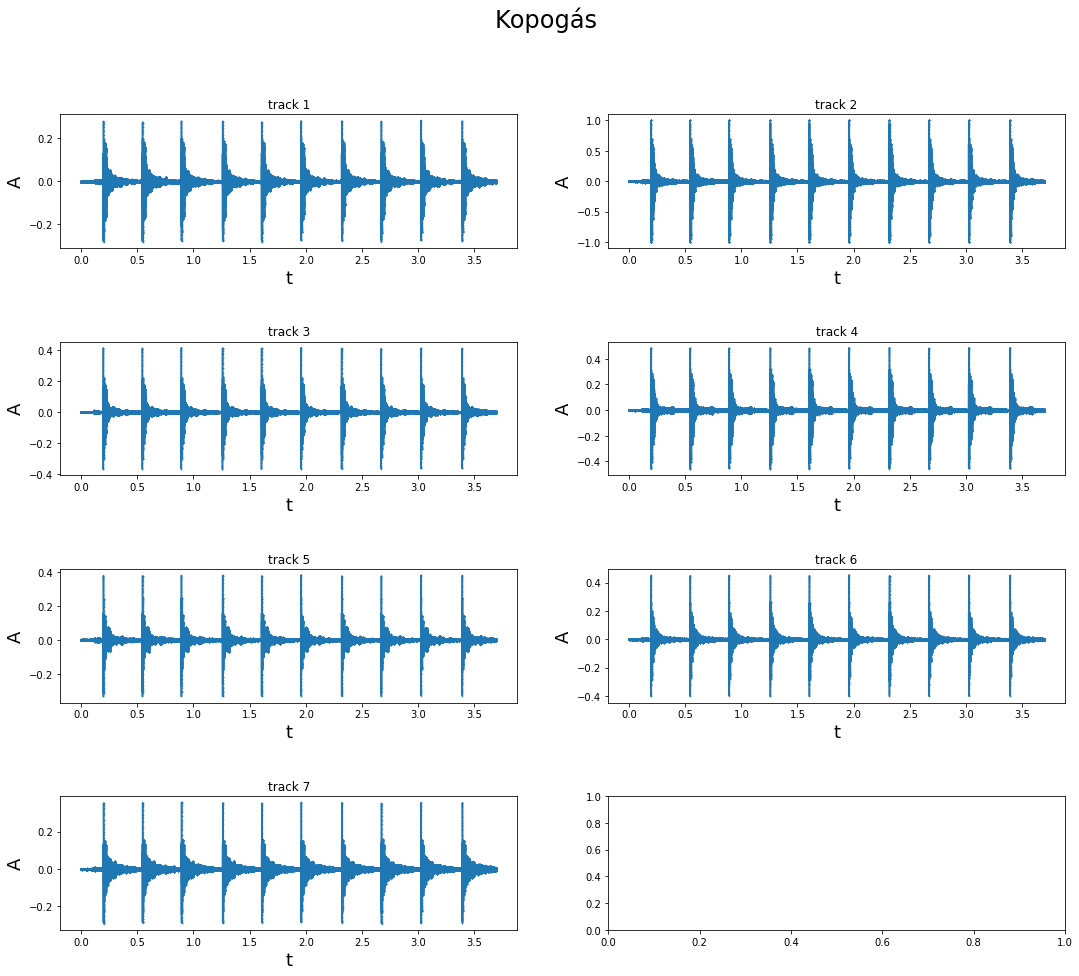

In [110]:
multiabra(kopogasc,"Kopogás","t","A")

In [114]:
#kopogás teljesítménye az átlag alapján (10 kopogás volt egy ciklusban)
teljesitmenyek_kop=[sum((1/i[0])*i[1]**2) for i in kopogasc]
for i in range(len(teljesitmenyek_kop)):
    j=i+1
    print("Az {}. csatorna egy kopogáshoz tartozó teljesítménye: {}".format(j,teljesitmenyek_kop[i]/10))

Az 1. csatorna egy kopogáshoz tartozó teljesítménye: 0.0003275277093052864
Az 2. csatorna egy kopogáshoz tartozó teljesítménye: 0.0037386152893304826
Az 3. csatorna egy kopogáshoz tartozó teljesítménye: 0.000383669720031321
Az 4. csatorna egy kopogáshoz tartozó teljesítménye: 0.0007452235091477633
Az 5. csatorna egy kopogáshoz tartozó teljesítménye: 0.00019459741888567806
Az 6. csatorna egy kopogáshoz tartozó teljesítménye: 0.000277002458460629
Az 7. csatorna egy kopogáshoz tartozó teljesítménye: 0.00024398777168244123


In [112]:
telspektrum_kop=[[kopogasc[i][0],abs(np.fft.rfft(kopogasc[i][1]))**2] for i in range(len(kopogasc))]

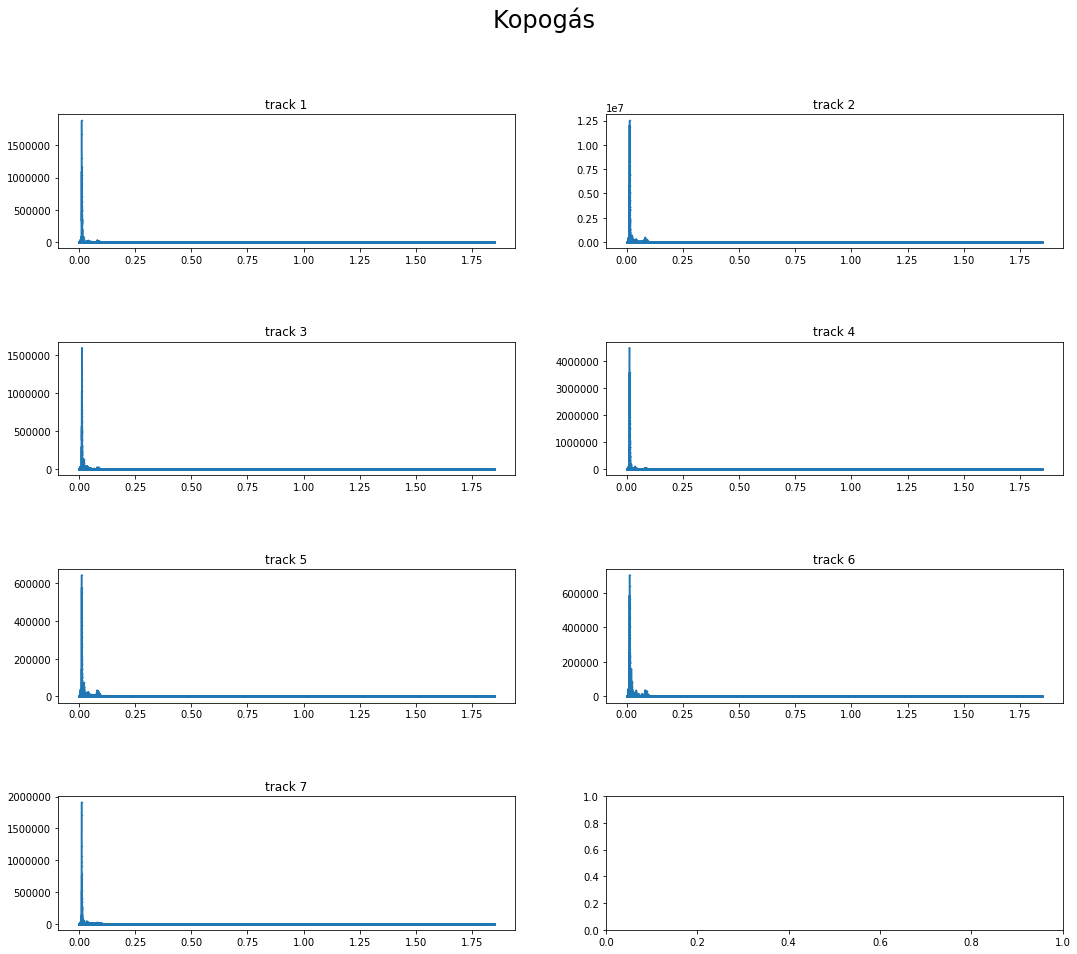

In [113]:
multiabra(telspektrum_kop,'Kopogás','','') # a teljesítményspektrumnál sokkal kisebbek az értékek, mint a zajnál

In [119]:
#távolságok
def tav(xy):
    return np.array([sqrt(xy[i,0]**2+xy[i,1]**2) for i in range(len(xy))])
mikrofon_xy=np.array([[67,45],[25,29.5],[19,8],[16,55.5],[61.5,7],[43.5,17.5],[92,15]])
mikrofon_r=tav(mikrofon_xy)

array([80.7093551 , 38.6684626 , 20.61552813, 57.76028047, 61.89709202,
       46.88816482, 93.21480569])

a kopogáshoz tartozó jel nem nagyon ingadozik kopogásonként

In [130]:
#jel zaj viszony
zaj=np.array([sum(hatter[i][1])/len(hatter[i][1]) for i in range(len(hatter))]) #atlagos zaj amplitudo
kopog_jel=np.array([sum(kopogasc[i][1])/len(kopogasc[i][1]) for i in range(len(kopogasc))]) #atlagos kopogas amplitudo
jelzaj=kopog_jel/zaj
for i in range(len(jelzaj)):
    j=i+1
    print("Az {}. csatorna jel/zaj aránya: {}".format(j,jelzaj[i]))
#a jel/zaj arányunk meglehetősen kicsi

Az 1. csatorna jel/zaj aránya: 1.0383268324591637
Az 2. csatorna jel/zaj aránya: 0.3359245515393706
Az 3. csatorna jel/zaj aránya: 0.970251413960187
Az 4. csatorna jel/zaj aránya: 0.9400067159761443
Az 5. csatorna jel/zaj aránya: 1.053645289077817
Az 6. csatorna jel/zaj aránya: 0.9895848623665605
Az 7. csatorna jel/zaj aránya: 1.0380923712935122


Text(0,0.5,'Jel/zaj arány [-]')

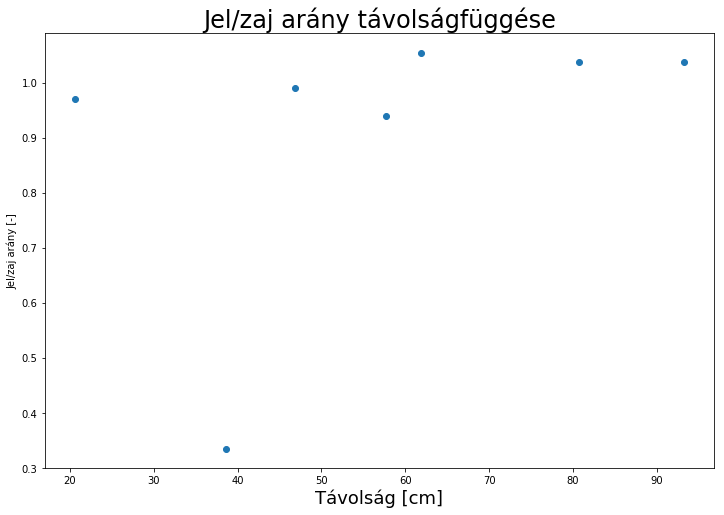

In [133]:
plt.figure(figsize=(12,8))
plt.plot(mikrofon_r,jelzaj,'o')
plt.title("Jel/zaj arány távolságfüggése",fontsize=24)
plt.xlabel("Távolság [cm]",fontsize=18)
plt.ylabel("Jel/zaj arány [-]")

Csökkenő távolsággal nagyobb jel/zaj arányt vártam, ez annak szöges ellentéte

## 2. feladat: A terem hőmérsékletének becslése - 5 pont

A méréshez két mikrofonra lesz szükség. Igyekezzen a mikrofonokat és a *kopogtatót* egy vonalban elhelyezni. A mikrofonok távolságát változtatva rögzítse a kopogtató hangját. Keresse meg a jel felfutását minden csatornán például minta indexben mérve. Ábrázolja ezek különbségét a távolságkülönbség függvényében és illesszen modellt! 

A hibák becsléséről se feledkezzen meg!

| Mérés | n | $\langle\Delta s\rangle$ | $\sigma(s)$ | $\Delta l$ [cm] | $\sigma(l)$ |
|-------|---|---------------------------|-------------|-------------------|-------------|
| 1. | . | . | . | . | 0.1 |0.5
| 2. | . | . | . | . | 0.2 |0.5
| 3. | . | . | . | . | 0.3 |0.5
| 4. | . | . | . | . | 0.4 |0.5
| 5. | . | . | . | . | 0.5 |0.5
| 6. | . | . | . | . | 0.6 |0.5
| 7. | . | . | . | . | 0.7 |0.5
| 8. | . | . | . | . | 0.8 |0.5
| 9. | . | . | . | . | 0.9 |0.5
| 10.| . | . | . | . | 1 |0.5


Az illesztéshez választott modell: **XXX**, ami alapján a becsült hangsebesség: **XXX**.

A hangsebesség többek között függ a levegő hőmérsékletétől, ez alapján milyen hőmérsékletet becsül?

megjegyzes: dS  -   perióduskülönbség (időben) a két mikrofonbaérkező jel között (mennyivel később érkezik a hang)
sigma: ds szórás
sigma l : 0.5 cm
dl : 10,20,30,40..cm

In [138]:
hangseb=[]
for i in range(10,110,10):
    fs, data = wavfile.read('hangseb/{}cm.wav'.format(i))
    hangseb.append([fs,data])
#a hangseb[i][2]-ben kéne lennie a második hangfilenak, így azonban nem tudom megcsinálni a feladatot....

In [153]:
#Meg kell keresni a jelek közötti eltérést -> két mikrofon maximumának időkülönbsége:
def dt_keres(hangseb):
    dt=[]
    for hang in hangseb:
        dt.append((np.where(hang[2] == hang[2].max())-np.where(hang[1] == hang[1].max()))*(1/hang[0]))
    return dt

In [ ]:
S=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]) #m
S_h=0.005 #m
dt=dt_keres(hangseb) #s
dt_h=valami

In [ ]:
#függvény
def lin(x,a,b):
    return a*x+b

from scipy.optimize import curve_fit

a=330
b=0.1

popt,pcov=curve_fit(lin,dt,S,pq=(a,b),sigma=S_h)

A függvény meredeksége adja meg a hangsebességet (v_hang=a), a b paraméterből a rendszer késleltetése számítható ki.

In [ ]:
xerr=np.array([dt_h]*10)
yerr=np.array([S_h*10])

plt.figure(figsize=12,8)
plt.errorbar(dt,S,xerr=xerr,yerr=yerr,'o',label="adatpontok")
plt.plot(dt,lin(dt,*p0,label='illesztés'))
plt.title("Hangsebesség illesztés",fontsize=24)
plt.xlabel("Időkólönbség [s]",fontsize=18)
plt.ylabel("Mikrofon távoság",fontsize=18)
plt.legend()

A szoba hőmérsékletét a kapott hangsebesség érték alapján ki lehetett volna keresni egy táblázatból

# A mikrofonok erősítéseinek súlyozása

In [155]:
egypont=[]
for i in range(1,8):
    fs, data = wavfile.read('egypontban/Audio Track-{}.wav'.format(i))
    hangseb.append([fs,data])

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [159]:
fs, data = wavfile.read('egypontban/Audio Track-1.wav') # ????

/opt/conda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [158]:
egypont

[]

In [157]:
multiabra(egypont,"Súlyozás","t [s]","A")

<Figure size 1296x1080 with 0 Axes>

## 3. feladat: Helymeghatározás síkon - 10 pont


A [leírásban](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0194394) szereplő likelihood becslés segítségével építsen sík-lokátort.

Dokumentálja a mérési összeállítást. Az asztal síkjában keltsen hangot a *kopogtatóval*. A mikrofonok jela alapján határozza meg a hangforrás helyét. Milyen pontosságot tud elérni?



A mikrofonok elrendezése azonos az 1-es feladatbelivel

Hangszóró koordinátái:
* (0,30.5,0) 1-es feladat adatait is felhasználom (kopogásnál) kopogas
* (-26,4,0) kopogas2
* (50,28,0) kopogas3
* (51,50.5,0) kopogas4

In [165]:
def dmikrofonhangszoro(xy,hangszoroxy):
    r=[]
    for i in xy:
        r.append(sqrt(abs(i[0]-hangszoroxy[0])**2+abs(i[1]-hangszoroxy[1])**2))
    return r

In [167]:
hangszoroxy1=[0,30.5]
#r=dmikrofonhangszoro(mikrofon_xy,hangszoroxy1)

In [169]:
c=330 #m/s

In [170]:
def Sigma2(sigma):
    osszeg=sum([1/sigma[i]**2 for i in range(7)])
    return 1/osszeg

In [ ]:
tauk=tau-tau0 #??? erre nem jöttem rá, hogyan számoljam

In [168]:
#ennek kell minimálisnak lennie!!!
def f(xy,hangszoroxy,sigma,tauk,c=330):
    r=dmikrofonhangszoro(xy,hangszoroxy)
    Sigma2=Sigma2(sigma)
    osszeg=0
    for i in range(7):
        osszeg2=0
        for j in range(7):
            osszeg2=osszeg2+(1/sigma[j]**2)*((r[i]-r[j])/c-(tauk[i]-tauk[j]))
        osszeg=osszeg+osszeg2*(1/sigma[i]**2)
    osszeg=osszeg*(1/(2*Sigma2))
    return osszeg

In [171]:
#minimum keresés
def hangxy(xy,sigma,tauk,hatarx=2,hatary=2,c=330):
    lista=[]
    for i in range(0,hatarx,0.01):
        for j in range(0,hatary,0.01):
            hangszoroxy=[i,j]
            lista.append([i,j,f(xy,hangszoroxy,sigma)])
    lista=np.array(lista)
    np.where(a == a.min())
    index=np.where(lista==min(lista[:,2]))
    return (lista[index,0],lista[index,1])